``Using Keras to Classify FashionMNIST dataset``

In [ ]:
%%time
import tensorflow as tf
from tensorflow import keras
from joblib import dump, load
import matplotlib.pyplot as plt

In [5]:
(train_imgs, train_labels), (val_imgs, val_labels) = keras.datasets.fashion_mnist.load_data()
train_imgs.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
val_imgs.shape, val_labels.shape

((10000, 28, 28), (10000,))

In [23]:
dump([train_imgs, train_labels], 'fmnist/fmnist_train.joblib')
dump([val_imgs, val_labels], 'fmnist/fmnist_val.joblib')

train_imgs, train_labels = load('fmnist/fmnist_train.joblib')
val_imgs, val_labels = load('fmnist/fmnist_val.joblib')

9

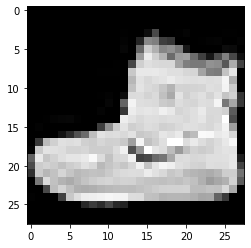

In [24]:
plt.imshow(train_imgs[0], cmap='gray');  train_labels[0]

In [25]:
train_imgs[0].shape

(28, 28)

In [26]:
# normalizing images
train_imgs = train_imgs/255.0
val_imgs = val_imgs/255.0


In [65]:
#  define a simple model
simple_model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [66]:
# simple_model.build(train_imgs[0].shape)
# simple_model.summary()

In [67]:
simple_model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [68]:
history = simple_model.fit(train_imgs, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4936 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3750 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3135 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8922


In [73]:
simple_model.evaluate(val_imgs, val_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3686 - accuracy: 0.8686


[0.3686312735080719, 0.8686000108718872]

In [42]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(train_imgs, train_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(val_imgs, val_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4978 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3721 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3101 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8922

MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8704


In [43]:
28*28

784

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# With convolutions

In [107]:
train_imgs.shape, val_imgs.shape

((60000, 28, 28), (10000, 28, 28))

In [108]:
train_img = train_imgs.reshape(60_000, 28, 28, 1)
val_img = val_imgs.reshape(10_000, 28, 28, 1)

In [126]:
conv_model = tf.keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [127]:
conv_model.compile('adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [128]:
conv_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [129]:
conv_model.fit(train_img, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4462 - accuracy: 0.8382
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.8893
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2559 - accuracy: 0.9044
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2259 - accuracy: 0.9147
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1986 - accuracy: 0.9245


In [113]:
conv_model.evaluate(val_img, val_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2689 - accuracy: 0.9017


[0.26894691586494446, 0.9017000198364258]

In [97]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [104]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(train_img, train_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(val_img, val_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 60s 5ms/step - loss: 0.4693 - accuracy: 0.8297
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3136 - accuracy: 0.8847
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2726 - accuracy: 0.9007
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2427 - accuracy: 0.9115
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2167 - accuracy: 0.9198

MODEL EVALUATION:
313/313 [==============================] - 1s 4ms/step - loss: 0.2750 - accuracy: 0.9001


In [100]:
train_imgs.shape, val_imgs.shape

((60000, 28, 28), (10000, 28, 28))

In [103]:
train_img = train_imgs.reshape(60_000, 28, 28, 1)
val_img = val_imgs.reshape(10000, 28, 28, 1)

In [116]:
#  visulaizing filters
print(val_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


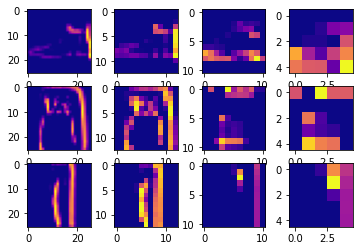

In [125]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(val_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='plasma')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(val_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='plasma')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(val_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='plasma')
  axarr[2,x].grid(False)